In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
sales = pd.read_csv("sales_data.xls")

In [4]:
sales.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [5]:
sales.isna().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [6]:
sales.shape

(578320, 12)

In [7]:
sales.loc[0:4, 'customer_id':'item_id']

,customer_id,device_id,item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6


In [8]:
sales.iloc[0:-1, 1:3]

,device_id,item_id
0,33b485de-7338-4997-b1d0-b988ba17b245,4
1,33b485de-7338-4997-b1d0-b988ba17b245,5
2,33b485de-7338-4997-b1d0-b988ba17b245,9
3,33b485de-7338-4997-b1d0-b988ba17b245,12
4,33b485de-7338-4997-b1d0-b988ba17b245,6
...,...,...
578314,74bb4936-9890-421b-a62a-ee544191fa1e,4
578315,74bb4936-9890-421b-a62a-ee544191fa1e,1
578316,74bb4936-9890-421b-a62a-ee544191fa1e,4
578317,74bb4936-9890-421b-a62a-ee544191fa1e,1


In [9]:
sales.set_index("location", inplace=True)

In [10]:
sales.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [11]:
sales.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

<Axes: xlabel='location'>

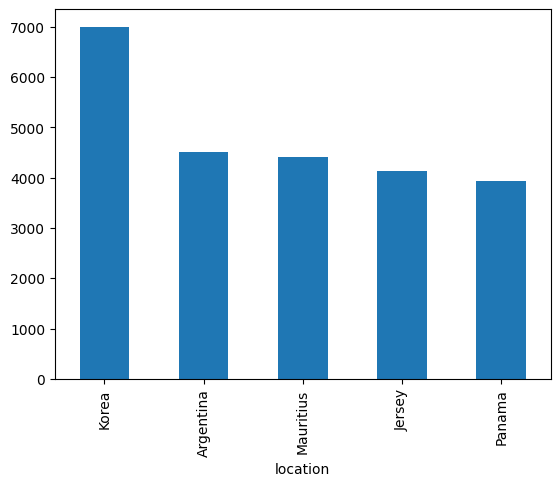

In [12]:
sales.index.value_counts().head(5).plot(kind='bar')

In [13]:
sales.loc['Brazil']

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,5,33934,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,5,USD,2024-03-30 04:13:18.001167,cancelled
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,11,33935,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,1,USD,2024-03-30 04:13:18.001167,cancelled
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,12,33936,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,5,USD,2024-03-30 04:13:18.001167,cancelled


In [14]:
#Filtering
sales[sales['customer_id'] == "56d7d069-2f58-4b35-9559-9405c45cae33"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,5,8235,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,1,8236,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,12,8237,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,1,NGN,2024-03-30 04:07:11.699402,success


In [15]:
currency_and_number_times_used = sales['currency'].value_counts()
currency_and_number_times_used

currency
USD    198037
GBP    191403
NGN    188880
Name: count, dtype: int64

<Axes: xlabel='currency'>

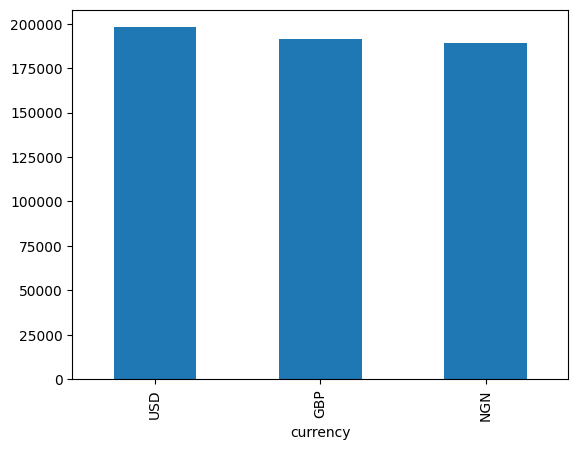

In [16]:
currency_and_number_times_used.plot(kind='bar')

In [17]:
# Applying multiple filters
mask = (sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999")

In [18]:
mask2 = (sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999") & (sales["status"] == "success")


In [19]:
sales.loc[mask2].head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success


In [20]:
sales[(sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999") & (sales["status"] == "success")].head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success


In [21]:
transaction_status = sales['status'].value_counts()

<Axes: xlabel='status'>

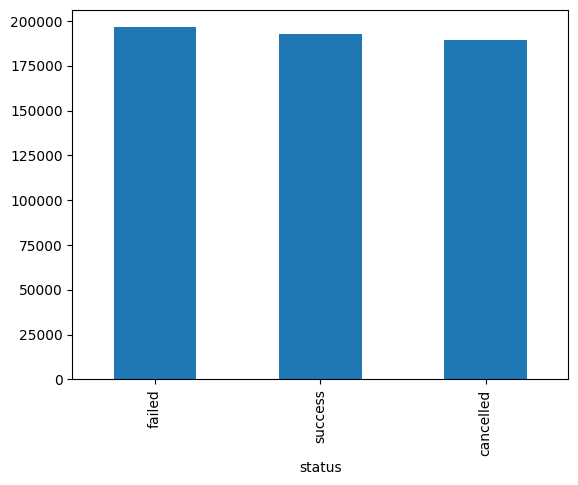

In [22]:
transaction_status.plot(kind='bar')

In [23]:
#Does the currency have effect on the status of the currency
currency_by_status = sales.groupby("status")['currency']


In [24]:
korea = sales.loc['Korea']
korea.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,14,3914,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,5,USD,2024-03-30 04:06:10.636247,cancelled
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,8,3915,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,2,USD,2024-03-30 04:06:10.636247,cancelled


In [25]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, Korea to Korea
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      6997 non-null   object
 1   device_id        6997 non-null   object
 2   item_id          6997 non-null   int64 
 3   line_item_id     6997 non-null   int64 
 4   order_id         6997 non-null   object
 5   event_id         6997 non-null   int64 
 6   event_timestamp  6997 non-null   object
 7   quantity         6997 non-null   int64 
 8   currency         6997 non-null   object
 9   checked_out_at   6997 non-null   object
 10  status           6997 non-null   object
dtypes: int64(4), object(7)
memory usage: 656.0+ KB


In [26]:
#status of transaction in korea
failed_transc = korea[korea['status'] == 'failed']
successful_transc = korea[korea['status'] == 'success']
cancelled_transc = korea[korea['status'] == 'cancelled']

In [27]:
# Number of failed transaction
failed_transc.shape[0]

1982

In [28]:
#Number of unique customers among the 1982 with failed transactions
failed_transc.customer_id.nunique()

11

In [29]:
failed_transc.customer_id.unique()

array(['34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf',
       '2933e91f-39d6-44af-b1e8-933ad172a3c6',
       'b20fe203-25fc-4ad8-96e9-5c8031093064',
       'c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810',
       'ea2aa16a-a791-47f0-95c5-066d17b5f09d',
       '39568cc0-3642-4234-9b88-c339d6953adf',
       'cd03dc6b-c884-433b-9e01-735e19ade944',
       '66e4bef6-a448-4e9e-b807-14a06728753f',
       '8498e8be-5899-4ad4-821f-d0df3da83157',
       'b4139e14-0478-41f0-bcbb-6792f0c6d957',
       'be397c29-0766-4bf0-a315-fa230d7e41d9'], dtype=object)

In [30]:
#Picking each customer to see  what really happened
cust_34d3c5e1= failed_transc[failed_transc["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"]
cust_34d3c5e1.head(1)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,4,4123,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,4,USD,2024-03-30 04:19:10.675876,failed


In [31]:
# Number of failed transaction by this customer
cust_34d3c5e1.shape[0]

198

In [32]:
#Currency used by this customer
cust_34d3c5e1.currency.unique()

array(['USD'], dtype=object)

In [33]:
#Could the dollar payment have affected the outcome of the failed transaction?
# cust_34d3c5e1 = successful_transc[successful_transc["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"]
# cust_34d3c5e1.head(2)
#this customer has no successful transaction

In [34]:
#Checking timestamp
cust_34d3c5e1['event_timestamp'].value_counts()

event_timestamp
2024-03-30 04:03:10.675869    18
2024-03-30 04:03:10.675806     9
2024-03-30 04:03:10.675807     9
2024-03-30 04:03:10.675808     9
2024-03-30 04:03:10.675805     9
2024-03-30 04:03:10.675852     9
2024-03-30 04:03:10.675855     9
2024-03-30 04:03:10.675857     9
2024-03-30 04:03:10.675856     9
2024-03-30 04:03:10.675860     9
2024-03-30 04:03:10.675861     9
2024-03-30 04:03:10.675862     9
2024-03-30 04:03:10.675858     9
2024-03-30 04:03:10.675863     9
2024-03-30 04:03:10.675865     9
2024-03-30 04:03:10.675866     9
2024-03-30 04:03:10.675867     9
2024-03-30 04:03:10.675871     9
2024-03-30 04:03:10.675872     9
2024-03-30 04:03:10.675873     9
2024-03-30 04:19:10.675876     9
Name: count, dtype: int64

In [35]:
# all failed transaction within a minute
cust_34d3c5e1['quantity'].sort_values(ascending=False)

location
Korea    5
Korea    5
Korea    5
Korea    5
Korea    5
        ..
Korea    1
Korea    1
Korea    1
Korea    1
Korea    1
Name: quantity, Length: 198, dtype: int64

In [36]:
cust_34d3c5e1['order_id'].value_counts()
# all transactions have the same id

order_id
15d53794-9b16-429c-9b84-5f2ac3a8c17a    198
Name: count, dtype: int64

In [37]:
cust_34d3c5e1['item_id'].value_counts()
#Each product was ordered 22 times

item_id
4     22
7     22
12    22
14    22
5     22
6     22
13    22
10    22
2     22
Name: count, dtype: int64

In [38]:
cust_34d3c5e1['event_id'].nunique()
#We have 22 events each

22

In [39]:
cust_34d3c5e1['event_id'].value_counts()

event_id
18956    9
18957    9
18958    9
18959    9
18960    9
18961    9
18962    9
18963    9
18964    9
18965    9
18966    9
18967    9
18968    9
18969    9
18970    9
18971    9
18972    9
18973    9
18974    9
18975    9
18976    9
18977    9
Name: count, dtype: int64

In [40]:
cust_34d3c5e1.duplicated().sum() #this customer has no duplicates

np.int64(0)

#### Insights:
From my discovery in this dataset... I could say that the transactions from customer "cust_34d3c5e1" may not have been carried out by a human because of the consistency of the patterns... the failed transactions may be carried out by a bot or it could be a system error.
#### Recommendation:
The business and innovation team should look at the case more intensely as I would go on and analyse all other failed transactions to uncover more insights...
Further more, a compresensive report would be written to highlight the findings of this analysis.

In [41]:
# Since Korea has the highest level of purchase, dig a little deeper
korea.currency.unique()

array(['USD', 'GBP', 'NGN'], dtype=object)

<Axes: xlabel='currency'>

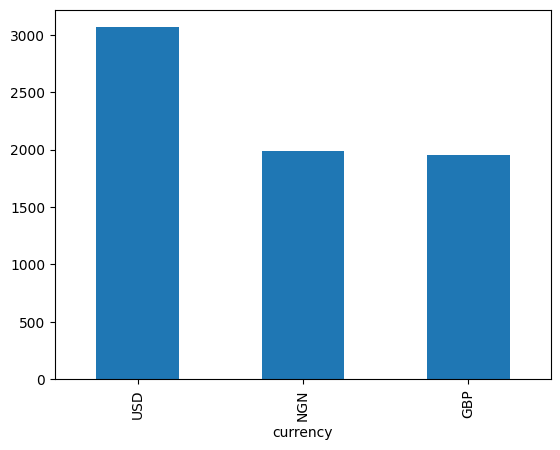

In [42]:
korea.currency.value_counts().plot(kind='bar')
# People from Korea speand more of dollars in their purchases than any other currency

In [43]:
korea.status.value_counts()

status
cancelled    2571
success      2444
failed       1982
Name: count, dtype: int64

<Axes: xlabel='status'>

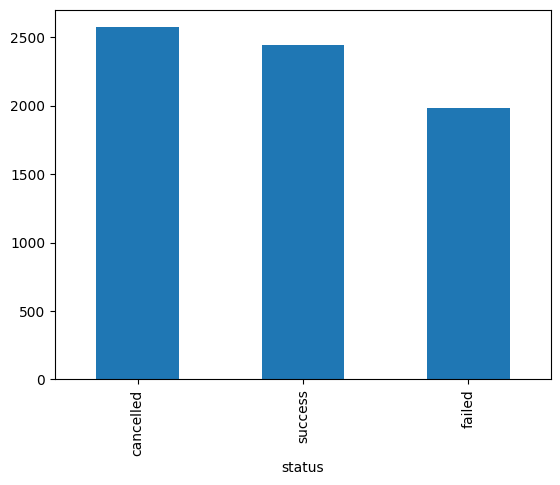

In [44]:
korea.status.value_counts().plot(kind='bar')

In [45]:
# Tracking customers with failed transactions, successful transaction, and cancelled transactions
korea['customer_id'].nunique()

46

In [46]:
sales['device_id'].nunique()

4594

In [47]:
sales['item_id'].value_counts()

item_id
11    39715
15    39268
8     39162
10    39084
2     38997
1     38866
4     38842
6     38835
5     38782
12    38440
7     38291
14    38043
13    37515
3     37501
9     36979
Name: count, dtype: int64

In [48]:
sales.item_id.nunique()

15

In [49]:
sales.line_item_id.nunique()

31741

In [50]:
#using 'str.contais()'
mask4 = (sales['status'].str.contains('failed'))
sales.loc[mask4].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed


In [51]:
# this one filtered out all of the ones with faile using ~
sales.loc[~mask4].head(4)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success


### Updating columns and row values

In [52]:
sales.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


In [53]:
new_copy = sales.copy()

In [54]:
new_copy.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [55]:
new_copy.rename(columns= {'customer_id': 'customer_ID'}, inplace=True)

In [56]:
new_copy.columns

Index(['customer_ID', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [57]:
new_copy.rename(columns= {'device_id': 'device_ID'}, inplace=True)

In [58]:
new_copy.columns = new_copy.columns.str.upper()

In [59]:
new_copy.head(2)

,CUSTOMER_ID,DEVICE_ID,ITEM_ID,LINE_ITEM_ID,ORDER_ID,EVENT_ID,EVENT_TIMESTAMP,QUANTITY,CURRENCY,CHECKED_OUT_AT,STATUS
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success


In [60]:
new_copy.columns = new_copy.columns.str.lower()

In [61]:
new_copy.head(1)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


### Using List Comprehension on the columns

In [62]:
new_copy.columns =[x.upper() for x in new_copy.columns]

In [63]:
new_copy.columns

Index(['CUSTOMER_ID', 'DEVICE_ID', 'ITEM_ID', 'LINE_ITEM_ID', 'ORDER_ID',
       'EVENT_ID', 'EVENT_TIMESTAMP', 'QUANTITY', 'CURRENCY', 'CHECKED_OUT_AT',
       'STATUS'],
      dtype='object')

In [64]:
new_copy.columns =[x.lower() for x in new_copy.columns]

In [65]:
new_copy.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [66]:
new_copy.columns = new_copy.columns.str.replace("_","")

In [67]:
new_copy.columns

Index(['customerid', 'deviceid', 'itemid', 'lineitemid', 'orderid', 'eventid',
       'eventtimestamp', 'quantity', 'currency', 'checkedoutat', 'status'],
      dtype='object')

In [68]:
new_copy.head(2)

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success


In [69]:
new_copy.apply(len)

customerid        578320
deviceid          578320
itemid            578320
lineitemid        578320
orderid           578320
eventid           578320
eventtimestamp    578320
quantity          578320
currency          578320
checkedoutat      578320
status            578320
dtype: int64

In [70]:
new_copy.apply(lambda x: x.min())

customerid        00096d0c-ced3-4913-afe9-5ce363f7126f
deviceid          000f53e2-b76e-4d2e-9db1-123c9535b5dc
itemid                                               1
lineitemid                                        3201
orderid           0013dca7-52fe-4794-ad3b-7b30958b368f
eventid                                          14786
eventtimestamp              2024-03-19 04:06:12.469246
quantity                                             1
currency                                           GBP
checkedoutat                2024-03-30 04:06:10.418189
status                                       cancelled
dtype: object

In [71]:
new_copy.apply(lambda x: x.max())

customerid        ffef23aa-84f4-45ba-96cc-2c4377220305
deviceid          fff883b4-569c-4620-9308-d185a3ec33c8
itemid                                              15
lineitemid                                       34941
orderid           fffcfc29-d713-4ca2-aa7b-36466cbda9d3
eventid                                         161960
eventtimestamp              2024-03-30 04:20:18.189028
quantity                                             5
currency                                           USD
checkedoutat                2024-03-30 04:20:18.189028
status                                         success
dtype: object

In [72]:
# new_copy.apply(lambda x:x.mean())
#runs endlessly

In [73]:
new_copy['status'].apply(len)

location
Saint Helena        7
Saint Helena        7
Saint Helena        7
Saint Helena        7
Saint Helena        7
                   ..
Christmas Island    6
Christmas Island    6
Christmas Island    6
Christmas Island    6
Christmas Island    6
Name: status, Length: 578320, dtype: int64

In [74]:
def capital_case(x):
    return x.upper()

In [75]:
new_copy['status'].apply(capital_case)

location
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
                     ...   
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Name: status, Length: 578320, dtype: object

In [76]:
new_copy['status'].apply(lambda x: x.lower())

location
Saint Helena        success
Saint Helena        success
Saint Helena        success
Saint Helena        success
Saint Helena        success
                     ...   
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Name: status, Length: 578320, dtype: object

In [78]:
new_copy2 = new_copy[['currency', 'status']]

In [79]:
new_copy2.head(2)

,currency,status
location,,
Saint Helena,NGN,success
Saint Helena,NGN,success


In [80]:
new_copy2.map(str.upper)

,currency,status
location,,
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
...,...,...
Christmas Island,USD,FAILED
Christmas Island,USD,FAILED
Christmas Island,USD,FAILED


In [81]:
new_copy2.map(str.lower)

,currency,status
location,,
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
...,...,...
Christmas Island,usd,failed
Christmas Island,usd,failed
Christmas Island,usd,failed


In [86]:
new_copy.shape

(578320, 11)

In [85]:
new_copy.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

In [82]:
new_copy3 = new_copy.copy()[-15: -1]

In [92]:
new_copy3.head(15)

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,USD,2024-03-30 04:14:18.224200,failed


In [84]:
new_copy3.shape

(14, 11)

In [ ]:
new_copy3['currency'] = new_copy3['currency'].map({'USD': 'EUR'})
#converts usd to eur

In [94]:
new_copy3['currency']

location
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Name: currency, dtype: object

In [95]:
new_copy3

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,EUR,2024-03-30 04:14:18.224200,failed


### Using Conditionals

In [96]:
# working on the status series
looping = new_copy[['quantity', 'currency', 'status']].reset_index()

In [97]:
looping.head(3)

,location,quantity,currency,status
0,Saint Helena,2,NGN,success
1,Saint Helena,4,NGN,success
2,Saint Helena,5,NGN,success


In [98]:
looping['status'].unique()

array(['success', 'failed', 'cancelled'], dtype=object)

In [108]:
looping['payment_stat_abr'] = np.nan #Creates a new column filled with NaN

In [109]:
looping.loc[0, 'payment_stat_abr'] = np.nan

In [110]:
looping.head()

,location,quantity,currency,status,payment_stat_abr
0,Saint Helena,2,NGN,success,NaN
1,Saint Helena,4,NGN,success,NaN
2,Saint Helena,5,NGN,success,NaN
3,Saint Helena,1,NGN,success,NaN
4,Saint Helena,2,NGN,success,NaN


In [111]:
looping['status'].str.strip()

0         success
1         success
2         success
3         success
4         success
           ...   
578315     failed
578316     failed
578317     failed
578318     failed
578319     failed
Name: status, Length: 578320, dtype: object

In [ ]:
%%time
mask = looping['status'] == 'success'